___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>

<center><em>Copyright: Pierian Data Inc.</em></center>

_____

# Stock Analysis Capstone Project - Solutions

-----

**Complete the tasks in bold below**

**TASK: Run the cells below to import the relevant libraries and load the related .csv files.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Portfolio of Bank Stocks**

In [3]:
# Bank of America
BAC = pd.read_csv("BAC.csv",parse_dates=True,index_col='Date')

# JP Morgan
JPM = pd.read_csv("JPM.csv",parse_dates=True,index_col='Date')

# CitiGroup
C = pd.read_csv('C.csv',parse_dates=True,index_col='Date')

# HSBC
HSBC = pd.read_csv("HSBC.csv",parse_dates=True,index_col='Date')

#Royal Bank of Canada
RY = pd.read_csv("RY.csv",parse_dates=True,index_col='Date')

#### List and Dictionary for Convenience

In [4]:
portfolio_list = [BAC,JPM,C,HSBC,RY]

In [5]:
portfolio_dict = {'BAC':BAC,'JPM':JPM,'C':C,'HSBC':HSBC,'RY':RY}

-----------------------

### Part One: Returns Analysis
-----------

**TASK: What is the start date and what is the end date for the price history of these stocks? (Note: They all share the same timespan, you just need to figure it out for one stock holding.)**

In [6]:
#CODE HERE

In [7]:
print(RY.index.max())
print(RY.index.min())

2021-09-03 00:00:00
2016-09-06 00:00:00


**TASK: Create a line plot showing the Adj. Close prices over the last 5 years for all the stocks in the portfolio (together on the same plot). Make sure the plot has a legend. [Hint to get them all on the same figure (but there are many ways to do this)](https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure)**

In [8]:
#CODE HERE

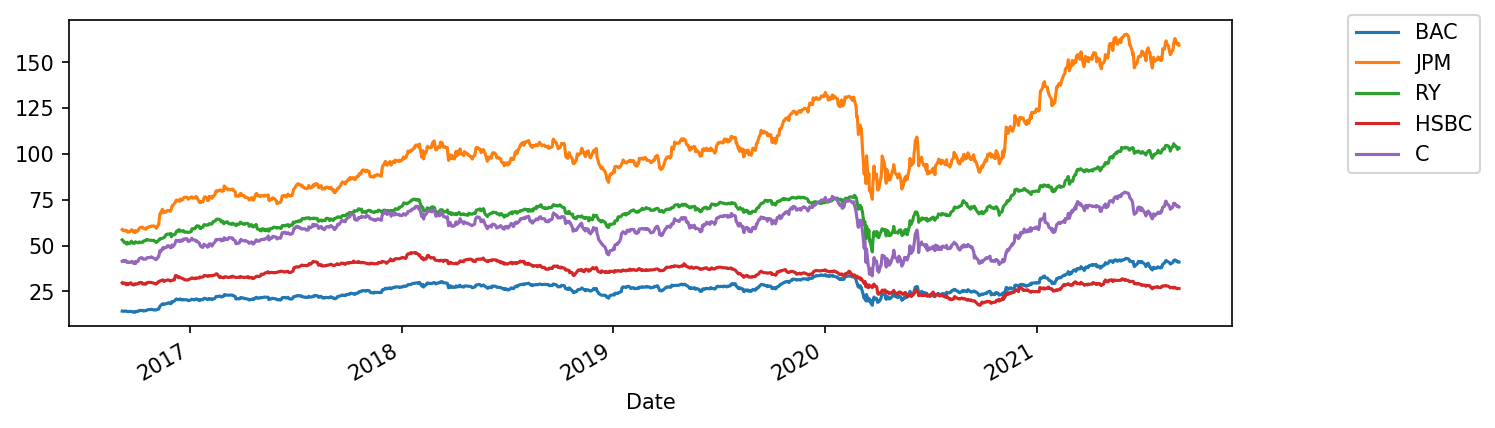

In [9]:
fig,ax = plt.subplots(dpi=150,figsize=(10,3))
BAC['Adj Close'].plot(ax=ax,label='BAC')
JPM['Adj Close'].plot(ax=ax,label='JPM')
RY['Adj Close'].plot(ax=ax,label='RY')
HSBC['Adj Close'].plot(ax=ax,label='HSBC')
C['Adj Close'].plot(ax=ax,label='C')
plt.legend(loc=(1.1,0.5))

**TASK: Create a function that takes in the Adj. Close price series, and then can calculate the stocks percent rise or decline from any set of given dates. For example, you should be able to pass in perc_calc(BAC,'2016-09-06','2021-09-03') and get back "Percent Change: 187.7%".**

You can actually do this in one line, but don't feel like you *have* to. You should also note, that you don't need to worry about checking someone's date, you can assume the dates provided are in the dataset (e.g. user won't pass in 2020-12-25). Feel free to add in a datetime check if you want.

In [15]:
def perc_calc(ticker,start_date,end_date):
    '''
    FILL IN THE CODE BELOW THAT CALCULATES THE PERCENT CHANGE 
    IN ADJ CLOSE PRICE FOR THE TICKER BETWEEN THE DATES
    '''
    pass

In [16]:
def perc_calc(ticker,start_date,end_date):
    
    if start_date not in ticker['Adj Close'].index or end_date not in ticker['Adj Close'].index:
        return f"Start or End dates not in index of Series"
    
    adj_close_start = ticker['Adj Close'][start_date]
    adj_close_end = ticker['Adj Close'][end_date]
    change = 100*(adj_close_end-adj_close_start)/adj_close_start
    return f"Percent Change: {np.round(change,2)}%"

In [17]:
perc_calc(BAC,'2016-09-06','2021-09-03')

'Percent Change: 187.74%'

**TASK: Create a histogram of the daily returns for each stock in the portfolio:**

In [18]:
#CODE HERE

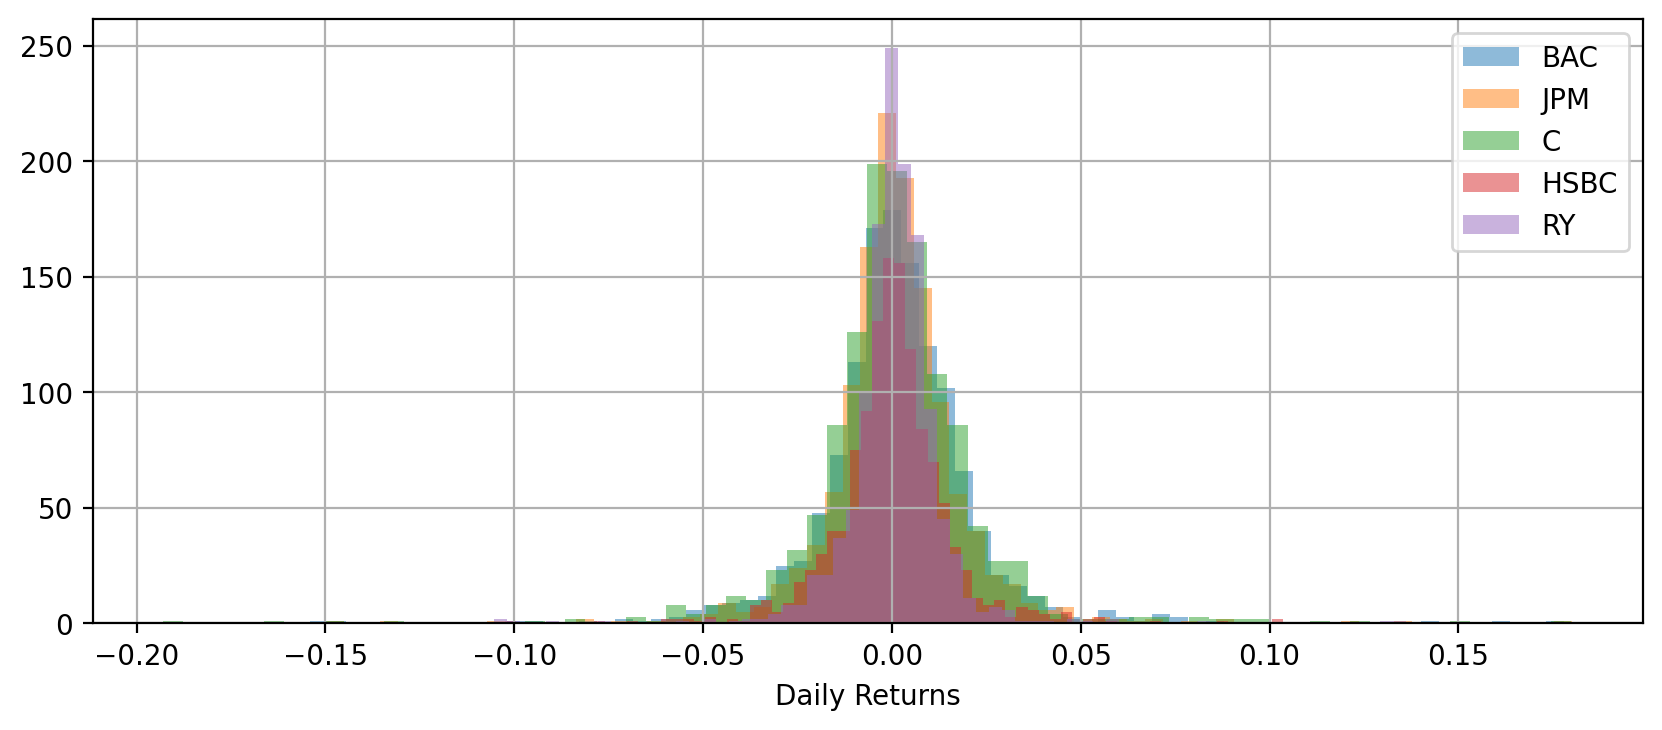

In [19]:
plt.figure(dpi=200,figsize=(10,4))
for stock_name,stock_df in portfolio_dict.items():
    stock_df['Adj Close'].pct_change(1).hist(label=stock_name,alpha=0.5,bins=70)

plt.xlabel("Daily Returns")
plt.legend()

**TASK: If you had invested \\$10,000 in BAC (approximately 701 shares) at the start of the time series, you would have about \\$28773 at the end of the time period. Create a plot that shows the value of \\$10,000 BAC at the start of the time series and what value it would have in dollars throughout the rest of the time period.**

*Note: There are many ways to calculate this!*

In [ ]:
#CODE HERE

In [90]:
bac_rets = BAC['Adj Close'].pct_change(1)[1:]
cumulative_ret = (bac_rets + 1).cumprod()
bac_10000 = cumulative_ret*10000

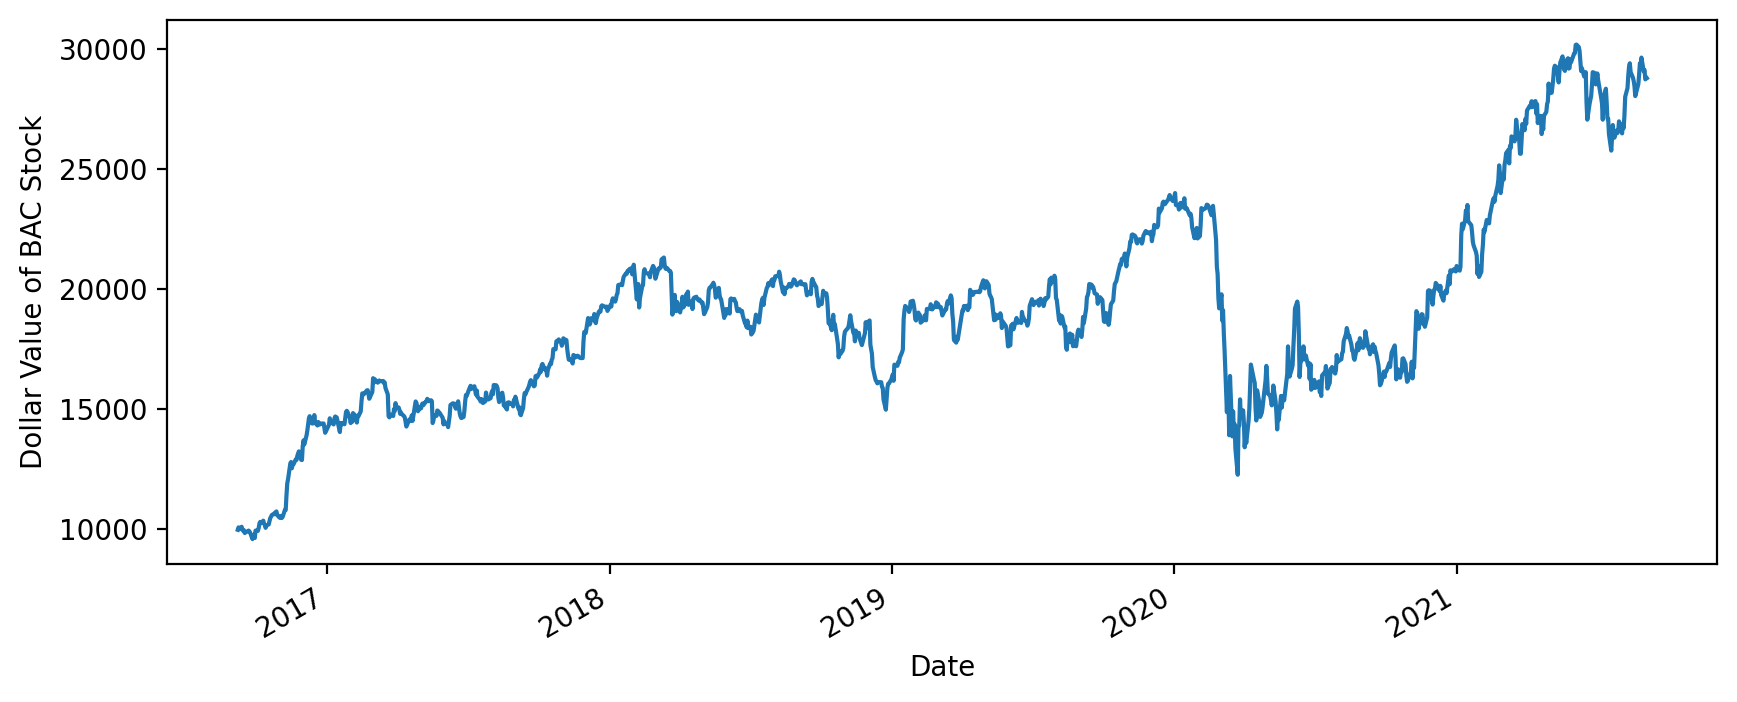

In [94]:
plt.figure(dpi=200,figsize=(10,4))
bac_10000.plot(ylabel='Dollar Value of BAC Stock');

**TASK: Find the Annualized Sharpe Ratios for each stock in the portfolio.**

In [104]:
#CODE HERE

In [98]:
def compute_sharpe_ratio(data, risk_free_rate = 0):
    mean_return = data["Adj Close"].pct_change(1).mean()
    std = data["Adj Close"].pct_change(1).std()
    sharpe_ratio = (mean_return-risk_free_rate) / std
    return (252**0.5) *sharpe_ratio

In [103]:
for ticker,df in portfolio_dict.items():
    print(f"{ticker} Annualized Sharpe Ratio is: {compute_sharpe_ratio(df)}")

BAC Annualized Sharpe Ratio is: 0.7947267104783114
JPM Annualized Sharpe Ratio is: 0.8165069200136565
C Annualized Sharpe Ratio is: 0.4791827651351636
HSBC Annualized Sharpe Ratio is: 0.03389350547471281
RY Annualized Sharpe Ratio is: 0.7323176596668222


------------------
### Part Two:  Volume Analysis 
-------------

**TASK: Create a plot showing the daily volume of stock traded over the time period of 5 years.**

In [20]:
#CODE HERE

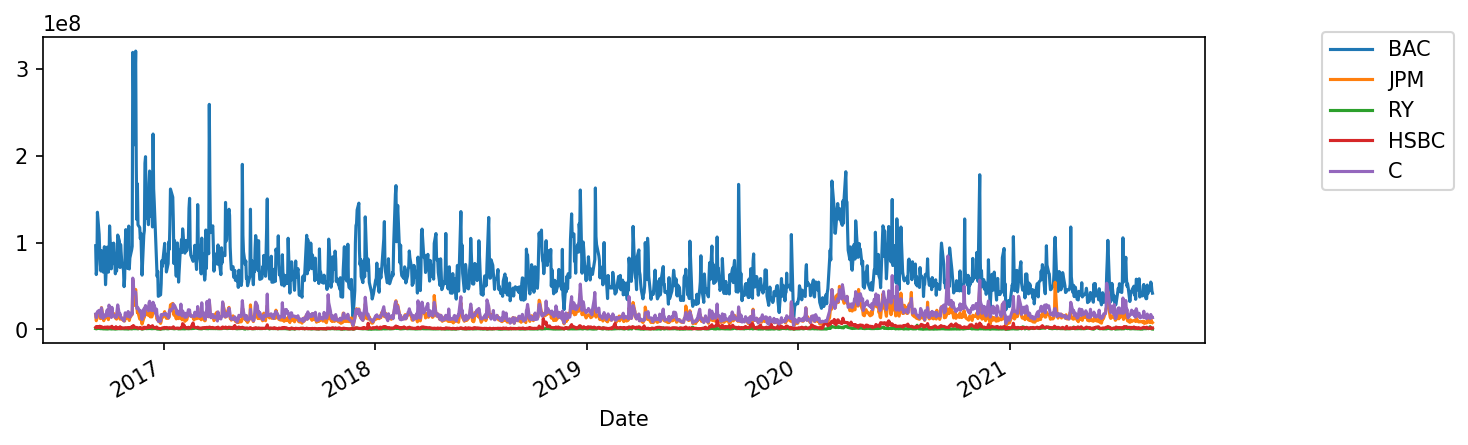

In [21]:
fig,ax = plt.subplots(dpi=150,figsize=(10,3))
BAC['Volume'].plot(ax=ax,label='BAC')
JPM['Volume'].plot(ax=ax,label='JPM')
RY['Volume'].plot(ax=ax,label='RY')
HSBC['Volume'].plot(ax=ax,label='HSBC')
C['Volume'].plot(ax=ax,label='C')
plt.legend(loc=(1.1,0.5))

**TASK: Now create a similar plot as the previous one, but it should reflect the total dollar amount, meaning you will need to take into account the price on each day the volume was traded. Feel free to use Adj Close price as the consensus price for a given day.**

In [22]:
# CODE HERE

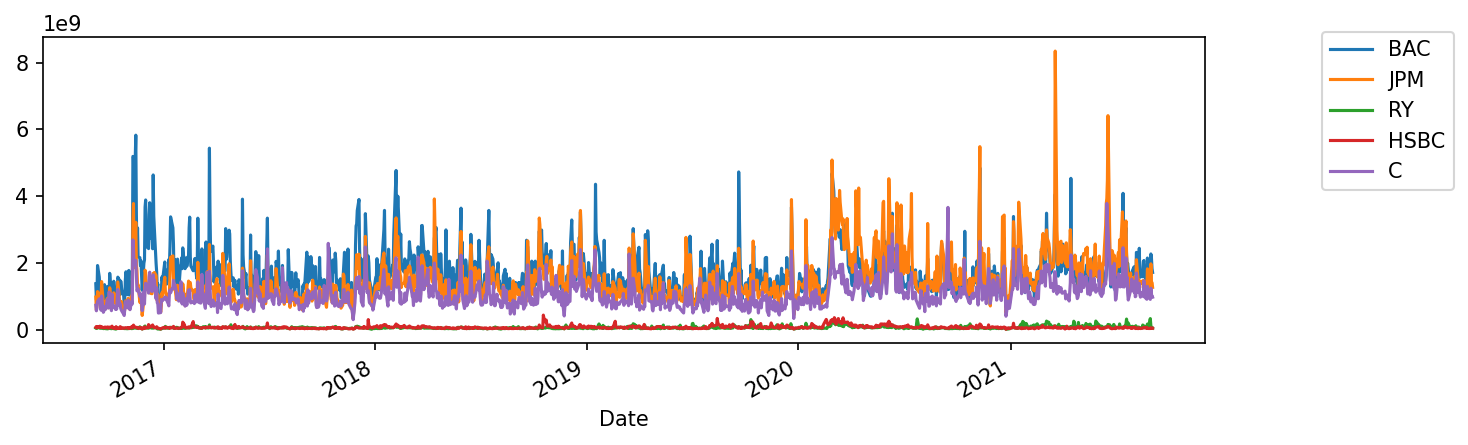

In [23]:
fig,ax = plt.subplots(dpi=150,figsize=(10,3))
(BAC['Volume']*BAC['Adj Close']).plot(ax=ax,label='BAC')
(JPM['Volume']*JPM['Adj Close']).plot(ax=ax,label='JPM')
(RY['Volume']*RY['Adj Close']).plot(ax=ax,label='RY')
(HSBC['Volume']*HSBC['Adj Close']).plot(ax=ax,label='HSBC')
(C['Volume']*C['Adj Close']).plot(ax=ax,label='C')
plt.legend(loc=(1.1,0.5))

**TASK: Based on your plot above, which stock had the highest dollar value amount traded of their stock on a single day and what date was this? Did anything significant happen aroudn this time period for that company?**

In [69]:
# CODE HERE

In [71]:
(JPM['Volume']*JPM['Adj Close']).max()

8345011203.784801

In [75]:
(JPM['Volume']*JPM['Adj Close']).idxmax()

Timestamp('2021-03-19 00:00:00')

In [76]:
(JPM['Volume']*JPM['Adj Close']).index

DatetimeIndex(['2016-09-06', '2016-09-07', '2016-09-08', '2016-09-09',
               '2016-09-12', '2016-09-13', '2016-09-14', '2016-09-15',
               '2016-09-16', '2016-09-19',
               ...
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-30', '2021-08-31', '2021-09-01',
               '2021-09-02', '2021-09-03'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [24]:
#Around March 19, 2021
# Fed Reserve Had A Meeting and on the 19th they released bank data:
# https://www.federalreserve.gov/newsevents/2021-march.htm

# JPM announced Chinese Bank Stake:
# https://www.wsj.com/articles/jpmorgan-to-buy-410-million-stake-in-chinese-banks-wealth-business-11616158788


--------
### Part Three: Technical Analysis
----

**TASK: Using only BAC stock, create a plot showing the Adj. Close Price along with the 60 day moving average of the price on the same plot.**

In [28]:
# CODE HERE

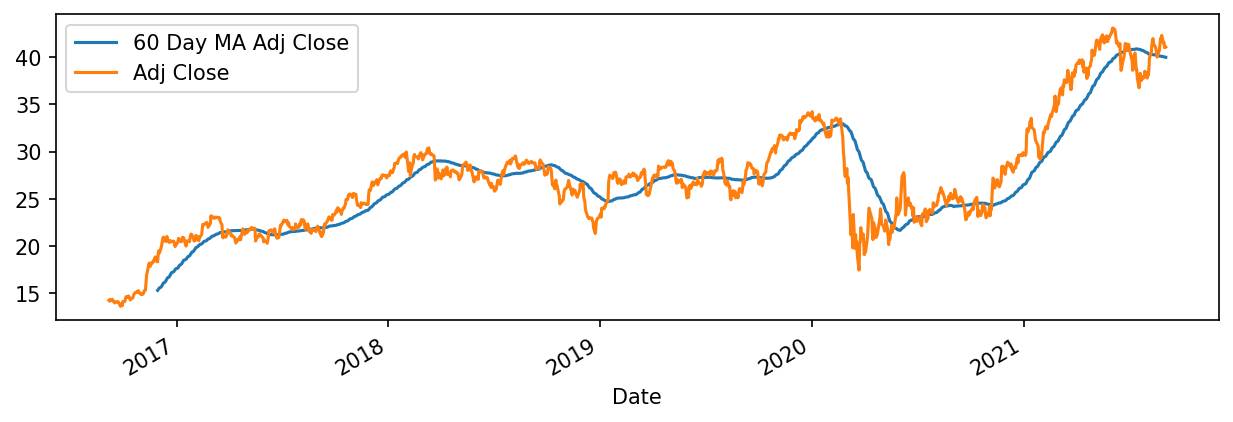

In [31]:
plt.figure(figsize=(10,3),dpi=150)
BAC['Adj Close'].rolling(window=60).mean().plot(label='60 Day MA Adj Close')
BAC['Adj Close'].plot(label='Adj Close')
plt.legend()

**BONUS TASK : Creating Bollinger Bands.**

Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method propounded by John Bollinger in the 1980s.

 Bollinger Bands consist of an N-period moving average (MA), an upper band at K times an N-period standard deviation above the moving average (MA + Kσ), and a lower band at K times an N-period standard deviation below the moving average (MA − Kσ). The chart thus expresses arbitrary choices or assumptions of the user, and is not strictly about the price data alone.

Typical values for N and K are 20 days and 2, respectively.

Source: [https://en.wikipedia.org/wiki/Bollinger_Bands](https://en.wikipedia.org/wiki/Bollinger_Bands)

**TASK: Create a plot which has the Adj. Close price and the upper and lower bollinger bands. Use the formula above, with N=20 days for the rolling rate of the moving average and K=2 for the multiplication of the standard deviation.**

<AxesSubplot:xlabel='Date'>

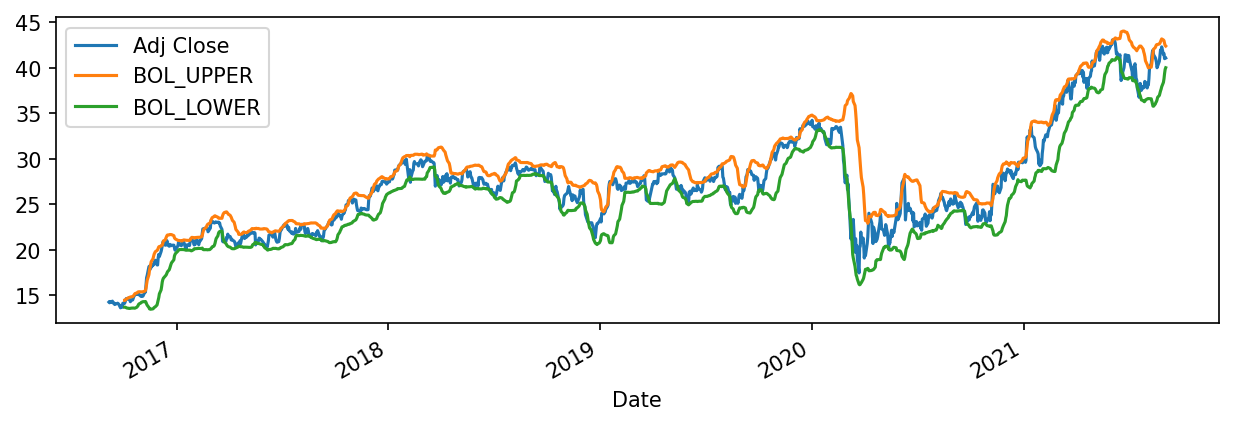

In [40]:
fig,ax = plt.subplots(figsize=(10,3),dpi=150)
BAC['MA'] = BAC['Adj Close'].rolling(20).mean()
BAC['STD'] = BAC['Adj Close'].rolling(20).std()
BAC['BOL_UPPER'] = BAC['MA'] + 2*BAC['STD']
BAC['BOL_LOWER'] = BAC['MA'] - 2*BAC['STD']
BAC[['Adj Close','BOL_UPPER','BOL_LOWER']].plot(ax=ax)

-----